In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#pd.set_option("mode.copy_on_write", True)
pd.set_option("display.max_columns", 100)

In [2]:
#Ouverture du fichier csv
df = pd.read_csv("games_may2024_full.csv")

In [3]:
#Information disponible pour les colonnes

#AppID : Unique ID of application on Steam
#------------------------------------------
#pct_pos_total : Game rating based on all reviews
#num_reviews_total : Total number of reviews for game
#pct_pos_recent : Game rating based on reviews in the last 30 days
#num_reviews_recent : Number of reviews in the last 30 days

## 1. Data Exploration

In [4]:
df.head(4)

,AppID,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,header_image,website,support_url,support_email,windows,mac,linux,metacritic_score,metacritic_url,achievements,recommendations,notes,supported_languages,full_audio_languages,packages,developers,publishers,categories,genres,screenshots,movies,user_score,score_rank,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
0,730,Counter-Strike 2,2012-08-21,0,0.0,1,"For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://counter-strike.net/,NaN,NaN,True,False,True,0,NaN,1,4111974,Includes intense violence and blood.,"['Czech', 'Danish', 'Dutch', 'English', 'Finni...","['English', 'Vietnamese']","[{'title': 'Buy Counter-Strike 2', 'descriptio...",['Valve'],['Valve'],"['Multi-player', 'Cross-Platform Multiplayer',...","['Action', 'Free to Play']",['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,NaN,7024836,1029779,100000000 - 200000000,29018,753,6078,352,1362469,"{'FPS': 90076, 'Shooter': 64786, 'Multiplayer'...",87,8071426,80,56072
1,578080,PUBG: BATTLEGROUNDS,2017-12-21,0,0.0,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",Play PUBG: BATTLEGROUNDS for free. Land on str...,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.pubg.com,https://support.playbattlegrounds.com,NaN,True,False,False,0,NaN,37,1701431,NaN,"['English', 'Korean', 'Simplified Chinese', 'F...",[],[],"['KRAFTON, Inc.']","['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,NaN,1379580,981860,50000000 - 100000000,0,0,0,0,590582,"{'Survival': 14611, 'Shooter': 12477, 'Battle ...",58,2365012,68,19517
2,570,Dota 2,2013-07-09,0,0.0,2,"The most-played game on Steam. Every day, mill...","The most-played game on Steam. Every day, mill...","Every day, millions of players worldwide enter...",“A modern multiplayer masterpiece.” 9.5/10 – D...,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.dota2.com/,NaN,NaN,True,True,True,90,https://www.metacritic.com/game/pc/dota-2?ftag...,0,14329,NaN,"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['English', 'Korean', 'Simplified Chinese', 'V...","[{'title': 'Buy Dota 2', 'description': '', 's...",['Valve'],['Valve'],"['Multi-player', 'Co-op', 'Steam Trading Cards...","['Action', 'Strategy', 'Free to Play']",['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,NaN,1832477,406030,200000000 - 500000000,35557,1327,1163,977,668192,"{'Free to Play': 59559, 'MOBA': 19966, 'Multip...",81,2247365,71,23832
3,271590,Grand Theft Auto V,2015-04-13,17,0.0,1,"When a young street hustler, a retired bank ro...","When a young street hustler, a retired bank ro...",Grand Theft Auto V for PC offers players the o...,NaN,https://shared.akamai.steamstatic.com/store_it...,http://www.rockstargames.com/V/,https://support.rockstargames.com,NaN,True,False,False,96,https://www.metacritic.com/game/pc/grand-theft...,77,1641404,NaN,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'Spanish - Latin America']","[{'title': 'Buy Shark Cash Cards', 'descriptio...",['Rockstar North'],['Rockstar Games'],"['Single-player', 'Multi-player', 'PvP', 'Onli...","['Action', 'Adventure']",['https://shared.akamai.steamstatic.com/store_...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,NaN,1557234,236827,50000000 - 100000000,12898,590,6910,235,133571,"{'Open World': 31998, 'Action': 23177, '

In [5]:
#Plateforme Steam
#Quelles caractéristiques doit avoir un jeu pour qu'il rapporte de bons revenus et soit populaire
#Quel ordre de prix viser

#Objectif : ajouter des jeux qui vont se vendre, seront populaires

#Ce qui va permettre de répondre :
# -nombre de personnes ayant le jeu
# -notes et retours des joueurs
# -prix
# -caractéristiques de jeu

In [6]:
#Sélection des colonnes du dataset
df.columns

#'name','estimated_owners','average_playtime_forever','average_playtime_2weeks','median_playtime_forever','median_playtime_2weeks'
#'price','categories','genres','tags','reviews','recommendations','notes','user_score','score_rank','positive','negative',
#'pct_pos_total','num_reviews_total','pct_pos_recent','num_reviews_recent','release_date','required_age'

Index(['AppID', 'name', 'release_date', 'required_age', 'price', 'dlc_count',
       'detailed_description', 'about_the_game', 'short_description',
       'reviews', 'header_image', 'website', 'support_url', 'support_email',
       'windows', 'mac', 'linux', 'metacritic_score', 'metacritic_url',
       'achievements', 'recommendations', 'notes', 'supported_languages',
       'full_audio_languages', 'packages', 'developers', 'publishers',
       'categories', 'genres', 'screenshots', 'movies', 'user_score',
       'score_rank', 'positive', 'negative', 'estimated_owners',
       'average_playtime_forever', 'average_playtime_2weeks',
       'median_playtime_forever', 'median_playtime_2weeks', 'peak_ccu', 'tags',
       'pct_pos_total', 'num_reviews_total', 'pct_pos_recent',
       'num_reviews_recent'],
      dtype='object')

In [7]:
df = df[['name','release_date','required_age','estimated_owners','price','categories','genres','tags','supported_languages',
         'full_audio_languages','average_playtime_forever','average_playtime_2weeks','median_playtime_forever','median_playtime_2weeks',
         'reviews','recommendations','notes','user_score','score_rank','pct_pos_total','num_reviews_total','pct_pos_recent',
         'num_reviews_recent','positive','negative']]

## 2. Data cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87806 entries, 0 to 87805
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      87803 non-null  object 
 1   release_date              87806 non-null  object 
 2   required_age              87806 non-null  int64  
 3   estimated_owners          87806 non-null  object 
 4   price                     87806 non-null  float64
 5   categories                87806 non-null  object 
 6   genres                    87806 non-null  object 
 7   tags                      87806 non-null  object 
 8   supported_languages       87806 non-null  object 
 9   full_audio_languages      87806 non-null  object 
 10  average_playtime_forever  87806 non-null  int64  
 11  average_playtime_2weeks   87806 non-null  int64  
 12  median_playtime_forever   87806 non-null  int64  
 13  median_playtime_2weeks    87806 non-null  int64  
 14  review

### a. Gestion des valeurs manquantes

In [9]:
#Colonnes à valeurs manquantes : name, reviews, notes, score_rank
df[['name','reviews','notes']]

,name,reviews,notes
0,Counter-Strike 2,NaN,Includes intense violence and blood.
1,PUBG: BATTLEGROUNDS,NaN,NaN
2,Dota 2,“A modern multiplayer masterpiece.” 9.5/10 – D...,NaN
3,Grand Theft Auto V,NaN,NaN
4,Tom Clancy's Rainbow Six® Siege,NaN,NaN
...,...,...,...
87801,Chess vs Chat,NaN,NaN
87802,Craggenrock Playtest,NaN,NaN
87803,Orbtangle,NaN,NaN
87804,Flashlight,NaN,"This game depicts frequent animated violence, ..."


In [10]:
#Suppression de score_rank, reviews, et notes
df.drop(columns=['reviews','notes','score_rank'], inplace=True)

#Recherche des valeurs manquantes de name
df[df['name'].isna()==True]

,name,release_date,required_age,estimated_owners,price,categories,genres,tags,supported_languages,full_audio_languages,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,recommendations,user_score,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent,positive,negative
25650,NaN,2016-11-01,0,0 - 0,0.00,[],[],[],[],[],0,0,0,0,0,0,71,60,-1,-1,0,0
34511,NaN,2019-09-25,0,0 - 0,2.79,"['Single-player', 'Steam Cloud', 'Family Shari...","['Action', 'Adventure', 'Casual', 'Indie', 'RP...",[],[],[],0,0,0,0,0,0,34,29,-1,-1,0,0
52830,NaN,2021-04-20,0,0 - 0,24.99,['Family Sharing'],[],[],[],[],0,0,0,0,0,0,-1,-1,-1,-1,0,0


In [11]:
#Il n'y a pas de données pour ces lignes : suppression des lignes
df = df[df['name'].isna()==False]

#### Recherche des valeurs manquantes cachées

In [14]:
for column in df:
    print(df[column].value_counts().iloc[0:5])
    print('--------------------------------------')

name
Shadow of the Tomb Raider: Definitive Edition    20
Alone                                             6
Tom Clancy's Rainbow Six® Siege                   5
Escape                                            5
Aurora                                            5
Name: count, dtype: int64
--------------------------------------
release_date
2024-03-28    123
2024-02-29    109
2023-12-01    103
2024-02-01    102
2023-11-30    100
Name: count, dtype: int64
--------------------------------------
required_age
0     86340
17      817
18      291
13      193
16       63
Name: count, dtype: int64
--------------------------------------
estimated_owners
0 - 20000          55116
0 - 0              10572
20000 - 50000       9692
50000 - 100000      4619
100000 - 200000     3040
Name: count, dtype: int64
--------------------------------------
price
0.00    16794
4.99     9043
9.99     8062
0.99     7949
1.99     6150
Name: count, dtype: int64
--------------------------------------
categories
['Sin

In [112]:
#valeurs nulles à supprimer : estimated_owners = 0-0
#missing values cachées : categories, genres, tags, supported languages, full audio, pct_pos, num_reviews

#colonnes à supprimer : required age, average_playtime, median_playtime, recommandations, user_score, pct_pos recent, num_review recent

In [113]:
df = df[df['estimated_owners']!='0 - 0']
df.drop(columns=['required_age','average_playtime_forever','average_playtime_2weeks','median_playtime_forever','median_playtime_2weeks',
                 'recommendations','user_score','pct_pos_recent','num_reviews_recent'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77231 entries, 0 to 87805
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  77231 non-null  object 
 1   release_date          77231 non-null  object 
 2   estimated_owners      77231 non-null  object 
 3   price                 77231 non-null  float64
 4   categories            77231 non-null  object 
 5   genres                77231 non-null  object 
 6   tags                  77231 non-null  object 
 7   supported_languages   77231 non-null  object 
 8   full_audio_languages  77231 non-null  object 
 9   pct_pos_total         77231 non-null  int64  
 10  num_reviews_total     77231 non-null  int64  
 11  positive              77231 non-null  int64  
 12  negative              77231 non-null  int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 8.2+ MB


In [114]:
#Transformation des valeurs manquantes
# categories, genres, tags, supported_languages, full_audio_languages : []
# pct_pos_total, num_reviews_total : -1 

df.replace({'categories':'[]', 'genres':'[]', 'tags':'[]', 'supported_languages':'[]', 'full_audio_languages':'[]'}, None, inplace=True)
df.replace({'pct_pos_total':-1, 'num_reviews_total':-1}, np.nan, inplace=True)

,price,pct_pos_total,num_reviews_total,positive,negative
count,77231.00,45410.00,45410.00,77231.00,77231.00
mean,8.00,76.86,2542.84,1409.76,229.99
std,12.95,17.73,47395.28,31906.43,6046.54
min,0.00,0.00,10.00,0.00,0.00
25%,1.99,67.00,21.00,3.00,0.00
50%,4.99,81.00,58.50,14.00,4.00
75%,9.99,90.00,277.00,79.00,22.00
max,999.98,100.00,8071426.00,7024836.00,1029779.00


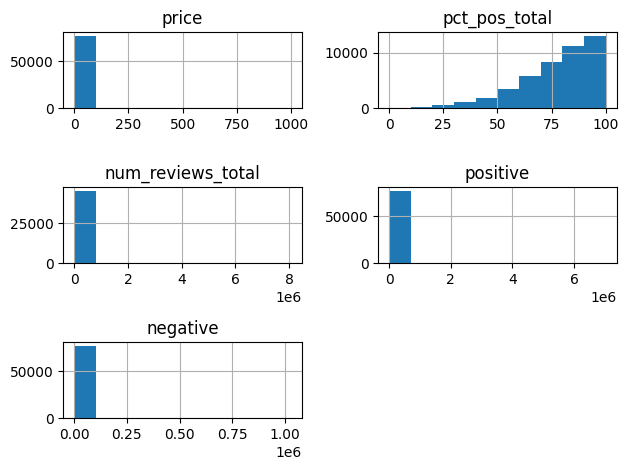

In [115]:
#Les valeurs manquantes cachées des autres colonnes
#colonnes numériques
df.hist()
plt.tight_layout()
df.describe().map(lambda x : f"{x:0.2f}")

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77231 entries, 0 to 87805
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  77231 non-null  object 
 1   release_date          77231 non-null  object 
 2   estimated_owners      77231 non-null  object 
 3   price                 77231 non-null  float64
 4   categories            76519 non-null  object 
 5   genres                77130 non-null  object 
 6   tags                  69943 non-null  object 
 7   supported_languages   77149 non-null  object 
 8   full_audio_languages  33669 non-null  object 
 9   pct_pos_total         45410 non-null  float64
 10  num_reviews_total     45410 non-null  float64
 11  positive              77231 non-null  int64  
 12  negative              77231 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 8.2+ MB


### b. Vérification des types de données

In [117]:
df.head(3)

,name,release_date,estimated_owners,price,categories,genres,tags,supported_languages,full_audio_languages,pct_pos_total,num_reviews_total,positive,negative
0,Counter-Strike 2,2012-08-21,100000000 - 200000000,0.0,"['Multi-player', 'Cross-Platform Multiplayer',...","['Action', 'Free to Play']","{'FPS': 90076, 'Shooter': 64786, 'Multiplayer'...","['Czech', 'Danish', 'Dutch', 'English', 'Finni...","['English', 'Vietnamese']",87.0,8071426.0,7024836,1029779
1,PUBG: BATTLEGROUNDS,2017-12-21,50000000 - 100000000,0.0,"['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...","{'Survival': 14611, 'Shooter': 12477, 'Battle ...","['English', 'Korean', 'Simplified Chinese', 'F...",None,58.0,2365012.0,1379580,981860
2,Dota 2,2013-07-09,200000000 - 500000000,0.0,"['Multi-player', 'Co-op', 'Steam Trading Cards...","['Action', 'Strategy', 'Free to Play']","{'Free to Play': 59559, 'MOBA': 19966, 'Multip...","['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['English', 'Korean', 'Simplified Chinese', 'V...",81.0,2247365.0,1832477,406030


In [118]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [119]:
i = list(df.columns).index('estimated_owners')
df.insert(i+1, 'estimated_owners_category', df['estimated_owners'])
df['estimated_owners'] = df['estimated_owners'].astype('string').str.split(' - ', expand=True).astype('int64').mean(axis=1)
df['estimated_owners'] = df['estimated_owners'].astype('int64')

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77231 entries, 0 to 87805
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   name                       77231 non-null  object        
 1   release_date               77231 non-null  datetime64[ns]
 2   estimated_owners           77231 non-null  int64         
 3   estimated_owners_category  77231 non-null  object        
 4   price                      77231 non-null  float64       
 5   categories                 76519 non-null  object        
 6   genres                     77130 non-null  object        
 7   tags                       69943 non-null  object        
 8   supported_languages        77149 non-null  object        
 9   full_audio_languages       33669 non-null  object        
 10  pct_pos_total              45410 non-null  float64       
 11  num_reviews_total          45410 non-null  float64       
 12  positive 

### c. Nettoyage des formats

In [121]:
#Nettoyer les données string
#Mettre les données d'une même colonne au même format pour pouvoir faire une comparaison entre elles
df[['name','categories','genres','tags','supported_languages','full_audio_languages']].head()

,name,categories,genres,tags,supported_languages,full_audio_languages
0,Counter-Strike 2,"['Multi-player', 'Cross-Platform Multiplayer',...","['Action', 'Free to Play']","{'FPS': 90076, 'Shooter': 64786, 'Multiplayer'...","['Czech', 'Danish', 'Dutch', 'English', 'Finni...","['English', 'Vietnamese']"
1,PUBG: BATTLEGROUNDS,"['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...","{'Survival': 14611, 'Shooter': 12477, 'Battle ...","['English', 'Korean', 'Simplified Chinese', 'F...",None
2,Dota 2,"['Multi-player', 'Co-op', 'Steam Trading Cards...","['Action', 'Strategy', 'Free to Play']","{'Free to Play': 59559, 'MOBA': 19966, 'Multip...","['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['English', 'Korean', 'Simplified Chinese', 'V..."
3,Grand Theft Auto V,"['Single-player', 'Multi-player', 'PvP', 'Onli...","['Action', 'Adventure']","{'Open World': 31998, 'Action': 23177, 'Multip...","['English', 'French', 'Italian', 'German', 'Sp...","['English', 'Spanish - Latin America']"
4,Tom Clancy's Rainbow Six® Siege,"['Single-player', 'Multi-player', 'PvP', 'Onli...",['Action'],"{'FPS': 8078, 'Multiplayer': 6138, 'Tactical':...","['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp..."


In [122]:
#mettre à jour avec None et nouvelles colones
column_list = ['categories','genres','tags','supported_languages','full_audio_languages']

for column in column_list:
    null = df[df[column].isna()==True].index
    values = {}

    for i in df.index:
        if column != 'tags':
            if i in null:
                values.update({i: None})
            else:
                values.update({i: df.loc[i,column].strip('\'[]').split('\', \'')})
        if column == 'tags':
            if i in null:
                data = None
            else:
                data = {}
                for element in df.loc[i,'tags'].replace('"', '\'').strip('\'{}').split(', \''):
                    key, value = element.split('\': ')
                    data.update({key: int(value)}) 
            values.update({i: data})

    df[column] = values

In [123]:
df[['name','categories','genres','tags','supported_languages','full_audio_languages']]

,name,categories,genres,tags,supported_languages,full_audio_languages
0,Counter-Strike 2,"[Multi-player, Cross-Platform Multiplayer, Ste...","[Action, Free to Play]","{'FPS': 90076, 'Shooter': 64786, 'Multiplayer'...","[Czech, Danish, Dutch, English, Finnish, Frenc...","[English, Vietnamese]"
1,PUBG: BATTLEGROUNDS,"[Multi-player, PvP, Online PvP, Stats, Remote ...","[Action, Adventure, Massively Multiplayer, Fre...","{'Survival': 14611, 'Shooter': 12477, 'Battle ...","[English, Korean, Simplified Chinese, French, ...",None
2,Dota 2,"[Multi-player, Co-op, Steam Trading Cards, Ste...","[Action, Strategy, Free to Play]","{'Free to Play': 59559, 'MOBA': 19966, 'Multip...","[Bulgarian, Czech, Danish, Dutch, English, Fin...","[English, Korean, Simplified Chinese, Vietnamese]"
3,Grand Theft Auto V,"[Single-player, Multi-player, PvP, Online PvP,...","[Action, Adventure]","{'Open World': 31998, 'Action': 23177, 'Multip...","[English, French, Italian, German, Spanish - S...","[English, Spanish - Latin America]"
4,Tom Clancy's Rainbow Six® Siege,"[Single-player, Multi-player, PvP, Online PvP,...",[Action],"{'FPS': 8078, 'Multiplayer': 6138, 'Tactical':...","[English, French, Italian, German, Spanish - S...","[English, French, Italian, German, Spanish - S..."
...,...,...,...,...,...,...
87800,Circuit Breaker,"[Single-player, Family Sharing]","[Casual, Indie, Strategy]","{'Strategy': 72, 'Casual': 48, 'PvE': 47, 'Sin...",[English],[English]
87801,Chess vs Chat,"[Single-player, Multi-player, PvP, Online PvP,...","[Indie, Strategy]","{'Indie': 31, 'Strategy': 21, 'Puzzle': 11, 'M...",[English],[English]
87803,Orbtangle,"[Single-player, Steam Achievements, Family Sha...",[Indie],"{'Puzzle': 54, 'Colorful': 46, 'Relaxing': 44,...",[English],[English]
87804,Flashlight,"[Single-player, Multi-player, PvP, Online PvP,...","[Action, Adventure, Indie]","{'Top-Down Shooter': 138, 'Rogue-lite': 132, '...",[English],None


### d. Suppression des duplicats

In [124]:
df1 = df.copy()
columns = ['categories','genres','tags','supported_languages','full_audio_languages']
df1[columns] = df1[columns].astype('str')

In [125]:
#Observation des duplicats
df1[df1.duplicated(keep=False)==True]
df1[df1.duplicated(subset=['name'], keep=False)==True].sort_values(by=['name','estimated_owners'], ascending=[True,False])

,name,release_date,estimated_owners,estimated_owners_category,price,categories,genres,tags,supported_languages,full_audio_languages,pct_pos_total,num_reviews_total,positive,negative
9118,A Walk in the Woods,2018-05-01,150000,100000 - 200000,0.00,"['Multi-player', 'PvP', 'Online PvP', 'Co-op',...","['Adventure', 'Free to Play', 'Indie']","{'Free to Play': 44, 'Horror': 36, 'Multiplaye...",['English'],['English'],40.0,548.0,224,324
21350,A Walk in the Woods,2020-04-21,10000,0 - 20000,0.00,"['Single-player', 'Full controller support', '...","['Indie', 'Simulation']","{'Indie': 106, 'Simulation': 106, 'VR': 15, 'S...",['English'],None,76.0,92.0,70,23
17129,ALONE,2021-05-31,150000,100000 - 200000,0.74,"['Single-player', 'Steam Achievements', 'Steam...","['Adventure', 'Casual', 'Indie']","{'Puzzle': 163, 'RPG': 157, '2D': 155, 'Top-Do...","['English', 'Korean', 'Thai']",None,88.0,151.0,140,20
70385,ALONE,2021-12-23,10000,0 - 20000,8.99,"['Single-player', 'Family Sharing']","['Action', 'Adventure', 'Indie']","{'Psychological Horror': 53, 'Exploration': 47...",['English'],['English'],NaN,NaN,4,4
45261,ASTRA,2024-01-05,75000,50000 - 100000,2.99,"['Single-player', 'Steam Achievements', 'Famil...",['Action'],"{'Action': 179, 'Adventure': 153, 'Dark Fantas...",['English'],['English'],71.0,14.0,13,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72323,labyrinth,2020-01-09,10000,0 - 20000,0.99,"['Single-player', 'Steam Achievements', 'Steam...","['Casual', 'Indie']","{'Casual': 117, 'Indie': 111, 'Relaxing': 39, ...",['English'],None,NaN,NaN,7,2
48663,none,2015-11-05,75000,50000 - 100000,0.00,"['Single-player', 'Multi-player', 'MMO', 'Onli...","['Adventure', 'Indie', 'Massively Multiplayer'...","{'Massively Multiplayer': 38, 'Strategy': 23, ...",['English'],['English'],41.0,12.0,9,23
46212,none,2015-11-04,35000,20000 - 50000,0.00,"['Single-player', 'Multi-player', 'Cross-Platf...","['Casual', 'Indie', 'Massively Multiplayer', '...","{'Indie': 47, 'Strategy': 31, 'Casual': 21, 'M...","['English', 'French', 'Italian', 'German', 'Sp...",None,30.0,13.0,14,32
71560,垃圾游戏,2023-06-11,10000,0 - 20000,2.99,"['Single-player', 'Family Sharing']","['Adventure', 'Casual', 'Indie', 'RPG', 'Strat...","{'Open World': 295, 'RPG': 294, 'Card Game': 2...",['Simplified Chinese'],['Simplified Chinese'],NaN,NaN,4,0


In [126]:
#Détermination des colonnes qui ont le plus de duplicats
df1_duplicates = df1[df1.duplicated(subset=['name'], keep=False)==True].copy()

In [127]:
#Pour chaque jeu, détermination des colonnes qui ont des valeurs différentes
def duplicated_by_columns(df):
    all_games_names = df['name'].unique()
    
    columns_list = {}
    for column in df.columns[1:]:
        columns_list.update({column: 0})	

    for game_name in all_games_names:
        for column in columns_list.keys():
            if len(df[df['name']==game_name][column].value_counts())>1:
                columns_list[column] +=1
    
    print('Total games with duplicates :', len(all_games_names))
    print('---------------------------------------------')
    print('Number of different values by column')
    print('---------------------------------------------')
    for element, count in sorted(columns_list.items(), key=lambda x: x[1]):
        print(f'{element} : {count}, [{len(all_games_names)-count}]')

duplicated_by_columns(df1_duplicates)

Total games with duplicates : 470
---------------------------------------------
Number of different values by column
---------------------------------------------
pct_pos_total : 118, [352]
num_reviews_total : 147, [323]
estimated_owners : 200, [270]
estimated_owners_category : 200, [270]
supported_languages : 254, [216]
full_audio_languages : 260, [210]
categories : 362, [108]
price : 378, [92]
genres : 386, [84]
release_date : 405, [65]
negative : 414, [56]
positive : 450, [20]
tags : 459, [11]


In [128]:
#Test des conditions pour vérifier qu'elles donnent les meilleurs résultats
def test_for_highest_values(df, sorting_column, value):
    all_games_names = df['name'].unique()
    
    results = {}
    for column in df.columns[1:]:
        results.update({column: 0})
    
    best_max = ['estimated_owners','price','categories','genres','tags','supported_languages','full_audio_languages','positive','negative',
                'pct_pos_total','num_reviews_total']
    best_min = ['release_date']
    for game_name in all_games_names:
        game_samples = df[df['name']==game_name].sort_values(by=sorting_column, ascending=value)
        #print(game_samples)
        sample = game_samples.iloc[0]
        others = game_samples.iloc[1:]
        #print(others.iloc[:,0:4])

        null = others[others[column].isna()==True].index
        for column in results.keys():
            if column in best_max:
                if sample[column] >= others[column].iloc[0] or others.index[0] in null:
                    results[column] += 1
            elif column in best_min:
                if sample[column] <= others[column].iloc[0] or others.index[0] in null:
                    results[column] += 1
            
    print('Number of best value obtained by column')
    print('---------------------------------------------')
    for column, count in sorted(results.items(), key=lambda x: x[1], reverse=True):
        print(f'{column} : {count}, [{len(all_games_names)-count}]')


sorting_columns = ['estimated_owners','num_reviews_total','pct_pos_total','price','release_date']
values = [False,False,False,False,True]
test_for_highest_values(df1_duplicates, sorting_columns, values)

Number of best value obtained by column
---------------------------------------------
estimated_owners : 470, [0]
positive : 385, [85]
negative : 372, [98]
full_audio_languages : 354, [116]
categories : 345, [125]
release_date : 323, [147]
supported_languages : 320, [150]
price : 317, [153]
tags : 277, [193]
genres : 276, [194]
num_reviews_total : 160, [310]
pct_pos_total : 129, [341]
estimated_owners_category : 0, [470]


In [130]:
#Vérification des éléments à supprimer
game_names = ["Tom Clancy's Rainbow Six® Siege",'Call of Duty®: Black Ops III','EA SPORTS FC™ 24']

df1.sort_values(by=sorting_columns, ascending=values, inplace=True)
df1[df1.duplicated(subset='name')==True].loc[df1['name'].isin(game_names)][['name','release_date','estimated_owners','price']]

#Suppression des duplicats
df1.drop_duplicates(subset='name', inplace=True)

In [131]:
df1[df1.duplicated(subset='name')==True]
df1['name'].value_counts()

name
Jam Scrapz Collection    1
Dota 2                   1
Counter-Strike 2         1
PUBG: BATTLEGROUNDS      1
Knight Speed             1
                        ..
Call of Duty®            1
Left 4 Dead 2            1
Apex Legends™            1
Rust                     1
Team Fortress 2          1
Name: count, Length: 76660, dtype: int64

In [132]:
df1.shape

(76660, 14)

In [133]:
df = df.loc[df1.index]

### e. Traitement des valeurs aberrantes

array([[<Axes: title={'center': 'release_date'}>,
        <Axes: title={'center': 'estimated_owners'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'pct_pos_total'}>,
        <Axes: title={'center': 'num_reviews_total'}>,
        <Axes: title={'center': 'positive'}>],
       [<Axes: title={'center': 'negative'}>, <Axes: >, <Axes: >]],
      dtype=object)

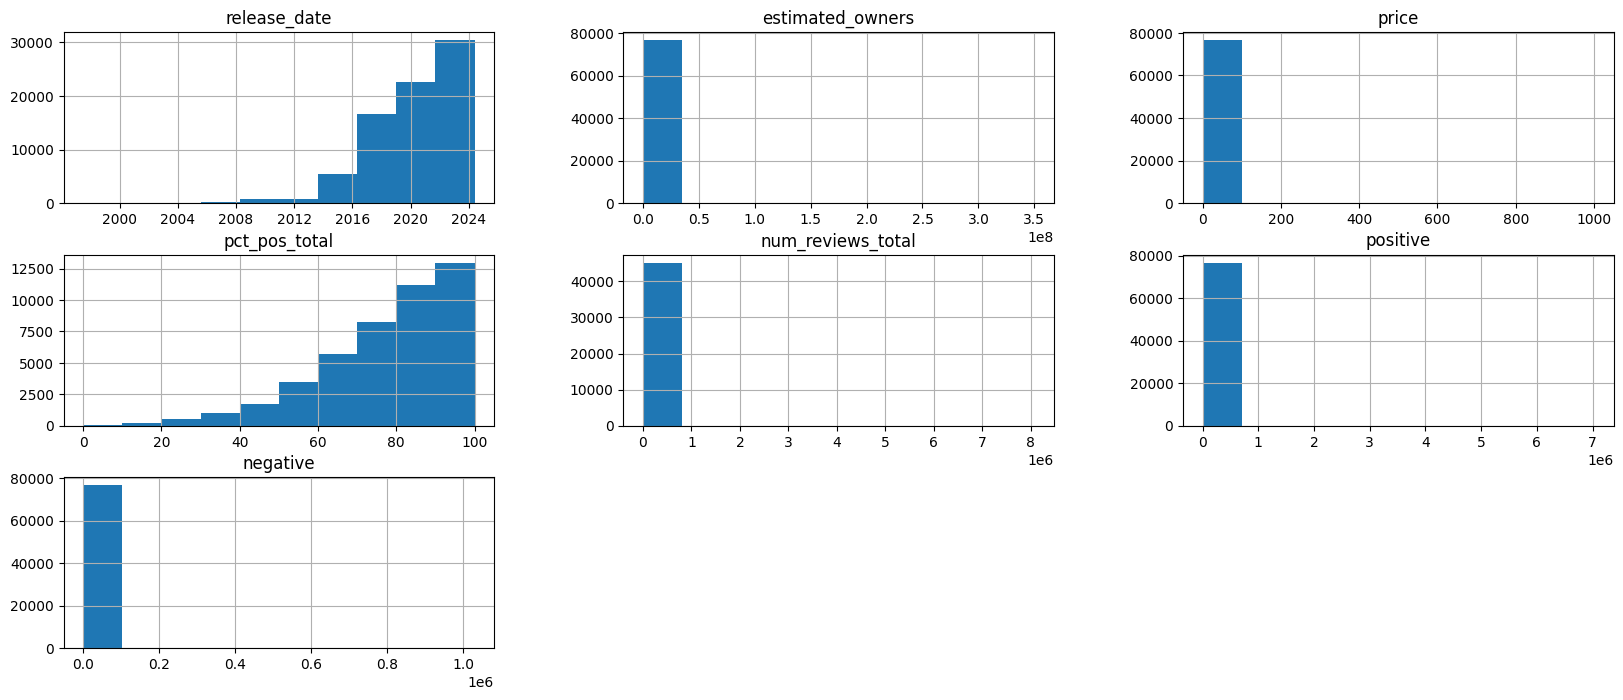

In [134]:
df.hist(figsize=(20,8))

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76660 entries, 2 to 82106
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   name                       76660 non-null  object        
 1   release_date               76660 non-null  datetime64[ns]
 2   estimated_owners           76660 non-null  int64         
 3   estimated_owners_category  76660 non-null  object        
 4   price                      76660 non-null  float64       
 5   categories                 75952 non-null  object        
 6   genres                     76559 non-null  object        
 7   tags                       69447 non-null  object        
 8   supported_languages        76579 non-null  object        
 9   full_audio_languages       33413 non-null  object        
 10  pct_pos_total              45179 non-null  float64       
 11  num_reviews_total          45179 non-null  float64       
 12  positive 

In [136]:
#transformer tags en liste
na_tag = df[df['tags'].isna()==True].index

tags_dict = {}
for i in df.index:
    if i not in na_tag:
        tags_dict.update({i: list(df.loc[i,'tags'].keys())})
    else:
        tags_dict.update({i : None})

df['tags'] = tags_dict

# df.drop(columns=['supported_languages','full_audio_languages'], inplace=True)
df.head(3)

,name,release_date,estimated_owners,estimated_owners_category,price,categories,genres,tags,supported_languages,full_audio_languages,pct_pos_total,num_reviews_total,positive,negative
2,Dota 2,2013-07-09,350000000,200000000 - 500000000,0.0,"[Multi-player, Co-op, Steam Trading Cards, Ste...","[Action, Strategy, Free to Play]","[Free to Play, MOBA, Multiplayer, Strategy, e-...","[Bulgarian, Czech, Danish, Dutch, English, Fin...","[English, Korean, Simplified Chinese, Vietnamese]",81.0,2247365.0,1832477,406030
0,Counter-Strike 2,2012-08-21,150000000,100000000 - 200000000,0.0,"[Multi-player, Cross-Platform Multiplayer, Ste...","[Action, Free to Play]","[FPS, Shooter, Multiplayer, Competitive, Actio...","[Czech, Danish, Dutch, English, Finnish, Frenc...","[English, Vietnamese]",87.0,8071426.0,7024836,1029779
1,PUBG: BATTLEGROUNDS,2017-12-21,75000000,50000000 - 100000000,0.0,"[Multi-player, PvP, Online PvP, Stats, Remote ...","[Action, Adventure, Massively Multiplayer, Fre...","[Survival, Shooter, Battle Royale, Multiplayer...","[English, Korean, Simplified Chinese, French, ...",None,58.0,2365012.0,1379580,981860


In [137]:
#Il n'y a pas de valeurs aberrantes

### f. Création de nouvelles colonnes

In [138]:
# df.rename(columns={'pct_pos_total': 'game_rate_based_on_reviews'}, inplace=True)
# df['num_reviews_total'] = df['positive']+df['negative']

df.insert(4, 'sales_revenue', df['estimated_owners']*df['price']*30/100)
df.reset_index(drop=True, inplace=True)

In [139]:
df.loc[3:5]

,name,release_date,estimated_owners,estimated_owners_category,sales_revenue,price,categories,genres,tags,supported_languages,full_audio_languages,pct_pos_total,num_reviews_total,positive,negative
3,Grand Theft Auto V,2015-04-13,75000000,50000000 - 100000000,0.0,0.00,"[Single-player, Multi-player, PvP, Online PvP,...","[Action, Adventure]","[Open World, Action, Multiplayer, Crime, Autom...","[English, French, Italian, German, Spanish - S...","[English, Spanish - Latin America]",87.0,1643791.0,1557234,236827
4,Team Fortress 2,2007-10-10,75000000,50000000 - 100000000,0.0,0.00,"[Multi-player, Cross-Platform Multiplayer, Ste...","[Action, Free to Play]","[Free to Play, Hero Shooter, Multiplayer, FPS,...","[English, Danish, Dutch, Finnish, French, Germ...","[English, Ukrainian]",93.0,1048199.0,980419,65046
5,Rust,2018-02-08,75000000,50000000 - 100000000,899775000.0,39.99,"[Multi-player, MMO, PvP, Online PvP, Co-op, On...","[Action, Adventure, Indie, Massively Multiplay...","[Survival, Crafting, Multiplayer, Open World, ...","[English, French, Italian, German, Spanish - S...","[English, French, Italian, German, Spanish - S...",87.0,874762.0,922081,136729


## 3. Data Analyse

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76660 entries, 0 to 76659
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   name                       76660 non-null  object        
 1   release_date               76660 non-null  datetime64[ns]
 2   estimated_owners           76660 non-null  int64         
 3   estimated_owners_category  76660 non-null  object        
 4   sales_revenue              76660 non-null  float64       
 5   price                      76660 non-null  float64       
 6   categories                 75952 non-null  object        
 7   genres                     76559 non-null  object        
 8   tags                       69447 non-null  object        
 9   supported_languages        76579 non-null  object        
 10  full_audio_languages       33413 non-null  object        
 11  pct_pos_total              45179 non-null  float64       
 12  num_

In [141]:
#Plateforme Steam
#Quelles caractéristiques doit avoir un jeu pour qu'il rapporte de bons revenus et soit populaire
#Quel ordre de prix viser

#Ce qui va permettre de répondre :
# -nombre de personnes ayant le jeu
# -notes et retours des joueurs
# -prix
# -caractéristiques de jeu

In [142]:
#Quel ordre de prix viser :
#Qu'est-ce qui rapporte le plus d'argent (entre jeux pas trop chers vs jeux chers)
#Quel est le prix où il y a le plus de ventes
#Quel est le prix où il y a le moins de ventes
#Quel est l'ordre de prix à cibler pour avoir beaucoup de ventes

#### a. Quelles caractéristiques doit avoir un jeu pour qu'il rapporte de bons revenus et soit populaire

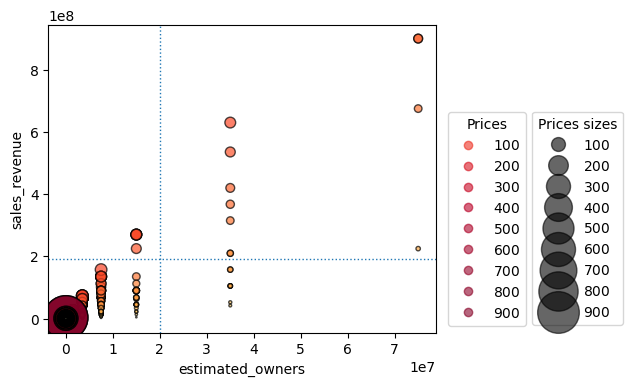

In [143]:
estimated_owners = df[df['sales_revenue']!=0]['estimated_owners']
sales_revenue = df[df['sales_revenue']!=0]['sales_revenue']
price = df[df['sales_revenue']!=0]['price']

fig, ax = plt.subplots(figsize=(5,4))
scatter = ax.scatter(x=estimated_owners, y=sales_revenue, s=price, c=price, cmap='YlOrRd', norm='log', alpha=0.7, linewidth =1, edgecolor='k')

handles1, labels1 = scatter.legend_elements(prop="sizes", alpha=0.6)
handles2, labels2 = scatter.legend_elements(prop="colors", alpha=0.6)
legend1 = ax.legend(handles1, labels1, loc="upper right", bbox_to_anchor=(1.5, 0.74), title="Prices sizes")
fig.add_artist(legend1)
legend2 = ax.legend(handles2, labels2, loc="lower right", bbox_to_anchor=(1.25, 0), title="Prices")

ax.set_xlabel('estimated_owners')
ax.set_ylabel('sales_revenue')
plt.axhline(1.9e8, linestyle=':', linewidth=1)
plt.axvline(2e7, linestyle=':', linewidth=1)

In [144]:
#Les revenus de Steam viennent majoritairement de ventes de beaucoup de jeux différents, achetés par un nombre un peu limité de joueurs 
#La deuxième majeure partie des revenus provient de ventes de peu de jeux, mais achetés par un très grand nombre de joueurs

In [145]:
#Quelles sont les caractéristiques propres à ces deux clusters (?)
#Qu'est-ce qui les différencie (?)

#Considérer les jeux bien notés et qui ont rapportés pas mal d'argent
#cluster 1 : sales_revenue < 2e8, estimated_owners < 2e7, note > 80
#cluster 2 : sales_revenue > 2e8, estimated_owners > 2e7, note > 80

In [146]:
df_cluster_lots_of_games = df[(df['sales_revenue']<1.9e8) & (df['estimated_owners']<2e7)].copy()
df_cluster_lots_of_owners = df[(df['sales_revenue']>1.9e8) & (df['estimated_owners']>2e7)].copy()

df_cluster_lots_of_games.reset_index(drop=True, inplace=True)
df_cluster_lots_of_owners.reset_index(drop=True, inplace=True)

#### b. Cluster 2 : Few games, lots of owners

In [147]:
df_cluster_lots_of_owners.sort_values(by=['sales_revenue','estimated_owners','price','release_date'], ascending=[False,False,False,True])

,name,release_date,estimated_owners,estimated_owners_category,sales_revenue,price,categories,genres,tags,supported_languages,full_audio_languages,pct_pos_total,num_reviews_total,positive,negative
0,Rust,2018-02-08,75000000,50000000 - 100000000,899775000.0,39.99,"[Multi-player, MMO, PvP, Online PvP, Co-op, On...","[Action, Adventure, Indie, Massively Multiplay...","[Survival, Crafting, Multiplayer, Open World, ...","[English, French, Italian, German, Spanish - S...","[English, French, Italian, German, Spanish - S...",87.0,874762.0,922081,136729
3,New World,2021-09-28,75000000,50000000 - 100000000,899775000.0,39.99,"[Multi-player, MMO, PvP, Online PvP, Co-op, On...","[Action, Adventure, Massively Multiplayer, RPG]","[Open World, Massively Multiplayer, MMORPG, RP...","[English, French, Italian, German, Spanish - S...","[English, French, German, Spanish - Spain, Por...",70.0,234960.0,192971,81455
2,Palworld,2024-01-18,75000000,50000000 - 100000000,674775000.0,29.99,"[Single-player, Multi-player, Co-op, Online Co...","[Action, Adventure, Indie, RPG, Early Access]","[Multiplayer, Open World, Creature Collector, ...","[English, Simplified Chinese, Traditional Chin...",None,93.0,258827.0,279408,18362
7,ELDEN RING,2022-02-24,35000000,20000000 - 50000000,629895000.0,59.99,"[Single-player, Multi-player, PvP, Online PvP,...","[Action, RPG]","[Souls-like, Dark Fantasy, Open World, RPG, Di...","[English, French, Italian, German, Spanish - S...","[English, Traditional Chinese]",93.0,607405.0,756178,58350
8,Baldur's Gate 3,2023-08-03,35000000,20000000 - 50000000,535395000.0,50.99,"[Single-player, Multi-player, Co-op, Online Co...","[Adventure, RPG, Strategy]","[RPG, Choices Matter, Character Customization,...","[English, French, German, Spanish - Spain, Pol...","[English, Japanese]",96.0,544556.0,588423,19560
6,HELLDIVERS™ 2,2024-02-08,35000000,20000000 - 50000000,419895000.0,39.99,"[Multi-player, Co-op, Online Co-op, Steam Achi...",[Action],"[Online Co-Op, Third-Person Shooter, Multiplay...","[English, French, Italian, German, Spanish - S...","[English, French, Italian, German, Spanish - S...",73.0,641080.0,630155,235602
10,Last Epoch,2024-02-21,35000000,20000000 - 50000000,367395000.0,34.99,"[Single-player, Multi-player, Co-op, Online Co...","[Action, Adventure, Indie, RPG]","[Action RPG, Loot, Hack and Slash, RPG, Isomet...","[English, French, German, Korean, Polish, Port...","[English, Spanish - Spain]",77.0,84420.0,72345,21304
5,Cyberpunk 2077,2020-12-09,35000000,20000000 - 50000000,314895000.0,29.99,"[Single-player, Steam Achievements, Full contr...",[RPG],"[Cyberpunk, Open World, Nudity, RPG, Singlepla...","[English, French, Italian, German, Spanish - S...","[English, French, Italian, German, Spanish - S...",83.0,655887.0,607709,132780
1,Left 4 Dead 2,2009-11-16,75000000,50000000 - 100000000,224775000.0,9.99,"[Single-player, Multi-player, PvP, Online PvP,...",[Action],"[Zombies, Co-op, FPS, Multiplayer, Shooter, On...","[Danish, Dutch, English, Finnish, French, Germ...","[English, French, German, Russian, Spanish - S...",97.0,643775.0,833935,21142
4,Tom Clancy's Rainbow Six® Siege,2015-12-01,35000000,20000000 - 50000000,209895000.0,19.99,"[Single-player, Multi-player, PvP, Online PvP,...",[Action],"[FPS, PvP, e-sports, Multiplayer, Tactical, Sh...","[English, French, Italian, German, Spanish - S...","[English, French, Italian, German, Spanish - S...",85.0,1091695.0,1094330,190046


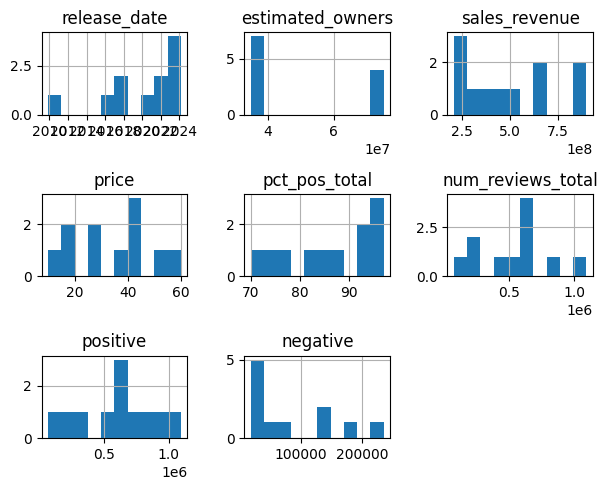

In [148]:
#Observation générale et rapide
df_cluster_lots_of_owners.hist(figsize=(6,5))
plt.tight_layout()

#Les prix sont < 60€, les notes sont bonnes à très bonnes et la plupart des jeux sont récents

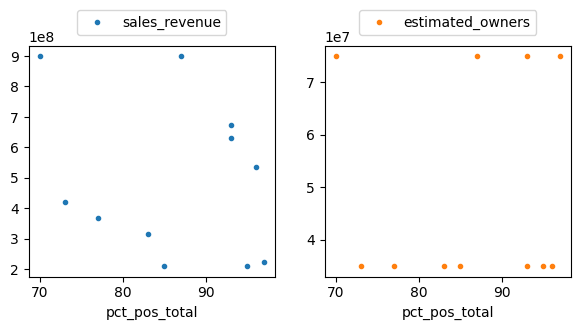

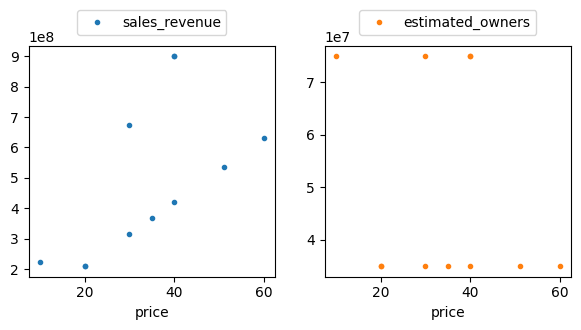

In [149]:
#Observation des prix et des notes de joueurs
df_cluster_lots_of_owners.plot(x='pct_pos_total', y=['sales_revenue','estimated_owners'], subplots=True, layout=(1,2), style='.', figsize=(7,3), legend=False)
for ax in plt.gcf().axes: ax.legend(loc='center', bbox_to_anchor=(0.5,1.1))

df_cluster_lots_of_owners.plot(x='price', y=['sales_revenue','estimated_owners'], subplots=True, layout=(1,2), style='.', figsize=(7,3), legend=False)
for ax in plt.gcf().axes: ax.legend(loc='center', bbox_to_anchor=(0.5,1.1))
#Bien qu'il y ait très peu de valeurs pour apporter une conclusion :
# -il n'y a pas de lien apparent avec les notes (si ce n'est qu'elles sont toutes bonnes ou très bonnes),
# -un prix autour de 40€ pourrait sembler être préférable 

In [150]:
#Observation des caractéristiques de jeu (colonnes categories, genres, tags, supported_languages, full_audio_languages)
df_cluster_lots_of_owners[['categories','genres','tags','supported_languages','full_audio_languages']].head()

,categories,genres,tags,supported_languages,full_audio_languages
0,"[Multi-player, MMO, PvP, Online PvP, Co-op, On...","[Action, Adventure, Indie, Massively Multiplay...","[Survival, Crafting, Multiplayer, Open World, ...","[English, French, Italian, German, Spanish - S...","[English, French, Italian, German, Spanish - S..."
1,"[Single-player, Multi-player, PvP, Online PvP,...",[Action],"[Zombies, Co-op, FPS, Multiplayer, Shooter, On...","[Danish, Dutch, English, Finnish, French, Germ...","[English, French, German, Russian, Spanish - S..."
2,"[Single-player, Multi-player, Co-op, Online Co...","[Action, Adventure, Indie, RPG, Early Access]","[Multiplayer, Open World, Creature Collector, ...","[English, Simplified Chinese, Traditional Chin...",None
3,"[Multi-player, MMO, PvP, Online PvP, Co-op, On...","[Action, Adventure, Massively Multiplayer, RPG]","[Open World, Massively Multiplayer, MMORPG, RP...","[English, French, Italian, German, Spanish - S...","[English, French, German, Spanish - Spain, Por..."
4,"[Single-player, Multi-player, PvP, Online PvP,...",[Action],"[FPS, PvP, e-sports, Multiplayer, Tactical, Sh...","[English, French, Italian, German, Spanish - S...","[English, French, Italian, German, Spanish - S..."


In [151]:
#Récupération et décompte pour chaque intitulé
dicts = {'categories':{}, 'genres':{}, 'tags':{}, 'supported_languages':{}, 'full_audio_languages':{}}
for row in df_cluster_lots_of_owners.index:
    for column in dicts.keys():
        
        if row==2 and column=='full_audio_languages':
            continue

        for word in df_cluster_lots_of_owners.loc[row,column]:
            if word in dicts[column].keys():
                dicts[column][word] += 1
            else:
                dicts[column].update({word: 1})

#Uniformisation sur des ensembles de colonnes
all_categories, languages = {}, {}
for keyy in dicts.keys():
    if keyy=='categories':
        for key, value in dicts[keyy].items():
            all_categories.update({key: [value,np.nan,np.nan]})

    elif keyy=='genres':
        for key, value in dicts[keyy].items():
            if key in all_categories.keys():
                all_categories[key][1] = value
            else:
                all_categories.update({key: [np.nan,value,np.nan]})    

    elif keyy=='tags':
        for key, value in dicts[keyy].items():
            if key in all_categories.keys():
                all_categories[key][2] = value
            else:
                all_categories.update({key: [np.nan,np.nan,value]}) 

    elif keyy=='supported_languages':
        for key, value in dicts[keyy].items():
            languages.update({key: [value,np.nan]})
    
    elif keyy=='full_audio_languages':
        for key, value in dicts[keyy].items():
            if key in languages.keys():
                languages[key][1] = value
            else:
                languages.update({key: [np.nan,value]})  

In [152]:
df2 = pd.DataFrame(all_categories).T
df2.columns=['categories','genres','tags']
df2.head()

,categories,genres,tags
Multi-player,10.0,NaN,NaN
MMO,2.0,NaN,NaN
PvP,5.0,NaN,4.0
Online PvP,5.0,NaN,NaN
Co-op,10.0,NaN,8.0


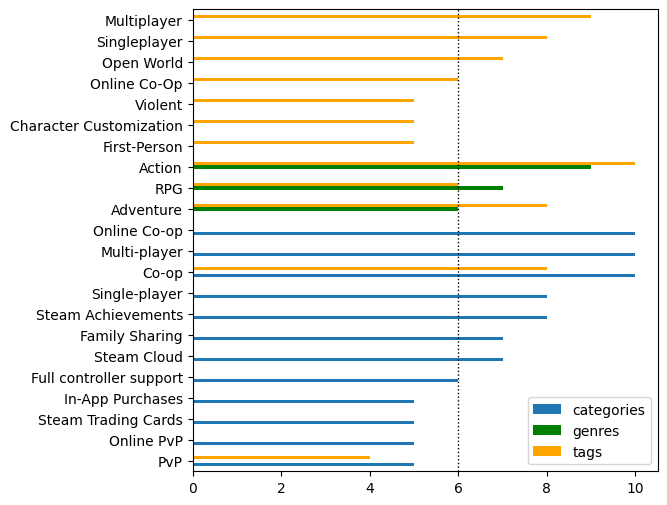

In [153]:
condition = (df2['categories']>=5) | (df2['genres']>=5) | (df2['tags']>=5)
df2[condition].sort_values(by=['categories','genres','tags']).plot(kind='barh', y=['categories','genres','tags'], 
                                                                   color=['tab:blue','green','orange'], figsize=(6,6))
plt.axvline(6, c='k', linestyle=':', linewidth=1)

#Tous les jeux seraient pour la plupart des jeux Solo, ouverts au Multi-player / à la Co-op. 
#Ils seraient égelement plutôt axés Action, avec de l'Open world / Aventure, et du RPG.
#Et une possibilité de jouer avec une manette

In [154]:
df3 = pd.DataFrame(languages).T
df3.columns=['supported_languages','full_audio_languages']
df3.head()

,supported_languages,full_audio_languages
English,11.0,10.0
French,11.0,6.0
Italian,10.0,4.0
German,11.0,6.0
Spanish - Spain,11.0,8.0


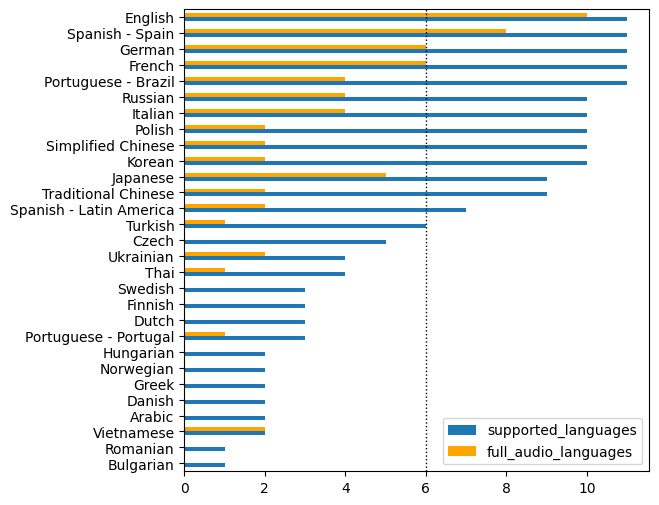

In [155]:
condition = (df3['supported_languages']>=5) | (df3['full_audio_languages']>=5)
df3.sort_values(by=['supported_languages','full_audio_languages']).plot(kind='barh', y=['supported_languages','full_audio_languages'], 
                                                                   color=['tab:blue','orange'], figsize=(6,6))
plt.axvline(6, c='k', linestyle=':', linewidth=1)

#Les langues les plus utilisées pour l'audio seraient les premières langues européennes : l'anglais, l'espagnol, l'allemand et le français
#Avec un plus large pannel (européen et international) pour les sous-titres : Portugais, Russe, Italien, Polonais, Chinois, Coréen, Japonais  
#Ce sont des jeux européens ouverts au marché international

In [156]:
#En résumé :
#Jeux disponibles pour l'europe et l'international
#Peut-être cibler principalement les joueurs européens

#Type : Solo, avec du Multiplayer / Co-op
#Catégories : Action, couplé à de l'Open-world / Aventure / RPG
#Langues audio : anglais, espagnol, allemand, français 
#Langues sous-titres : portugais, russe, italien, polonais, chinois, coréen, japonais 
# Plus : possible de jouer avec une manette

#### c. Cluster 1 : Lots of games, few owners

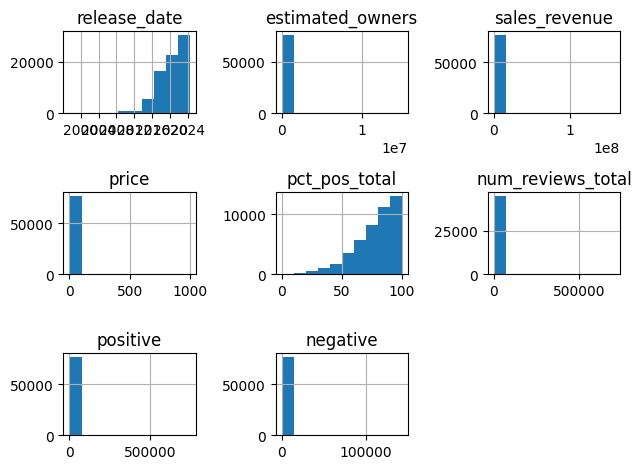

In [157]:
df_cluster_lots_of_games.hist()
plt.tight_layout()

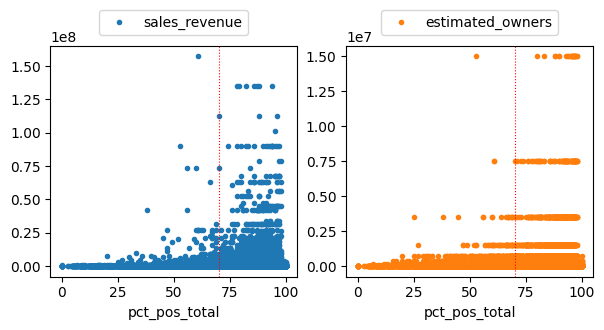

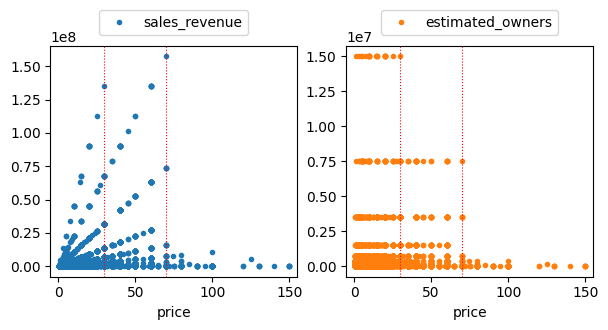

In [158]:
#Observation des prix et des notes de joueurs
df1 = df_cluster_lots_of_games.copy()
df1.reset_index(drop=True, inplace=True)

df1[df1['sales_revenue']!=0].plot(x='pct_pos_total', y=['sales_revenue','estimated_owners'], subplots=True, layout=(1,2), style='.', figsize=(7,3), legend=False)
for ax in plt.gcf().axes: ax.legend(loc='center', bbox_to_anchor=(0.5,1.1)), ax.axvline(70, c='r', linestyle=':', linewidth=0.8)

df1[df1['sales_revenue']!=0].plot(x='price', y=['sales_revenue','estimated_owners'], xlim=(-5,155), subplots=True, layout=(1,2), style='.', figsize=(7,3), legend=False)
for ax in plt.gcf().axes: ax.legend(loc='center', bbox_to_anchor=(0.5,1.1)), ax.axvline(30, c='r', linestyle=':', linewidth=0.8), ax.axvline(70, c='r', linestyle=':', linewidth=0.8)

#On voit que les hauts revenus correspondent à des notes >= 70, et c'est pareil pour les plus hauts owners
#Les plus hauts revenus étant atteins pour des prix de 30 à 70€, et les jeux les plus achetés sont à 30€ et 70€ maximum

In [159]:
#Objectifs : 
# -sales_revenue min : 200 000€, 
# -estimated_owners min : 350 000 owners/jeu

In [160]:
#Analyse des caractéristiques des jeux répondants aux critères
df2 = df1[(df1['sales_revenue']>=2e5) & (df1['pct_pos_total']>=70) & (df1['estimated_owners']>=3.5e5)].copy()
df2.head(4)

,name,release_date,estimated_owners,estimated_owners_category,sales_revenue,price,categories,genres,tags,supported_languages,full_audio_languages,pct_pos_total,num_reviews_total,positive,negative
0,The Witcher® 3: Wild Hunt,2015-05-18,15000000,10000000 - 20000000,44955000.0,9.99,"[Single-player, Steam Achievements, Steam Trad...",[RPG],"[Open World, RPG, Story Rich, Atmospheric, Mat...","[English, French, Italian, German, Spanish - S...","[English, French, German, Japanese, Korean, Po...",96.0,707825.0,745488,30154
1,Euro Truck Simulator 2,2012-10-12,15000000,10000000 - 20000000,22455000.0,4.99,"[Single-player, Multi-player, Co-op, Online Co...","[Indie, Simulation]","[Driving, Transportation, Simulation, Open Wor...","[English, German, French, Italian, Korean, Spa...",None,97.0,567017.0,741774,19658
2,Phasmophobia,2020-09-18,15000000,10000000 - 20000000,62955000.0,13.99,"[Single-player, Multi-player, Co-op, Online Co...","[Action, Indie, Early Access]","[Horror, Online Co-Op, Multiplayer, Psychologi...","[English, Portuguese - Portugal, Spanish - Spa...","[English, Catalan]",96.0,551355.0,649214,27095
3,Dead by Daylight,2016-06-14,15000000,10000000 - 20000000,89955000.0,19.99,"[Multi-player, PvP, Online PvP, Co-op, Online ...",[Action],"[Horror, Survival Horror, Multiplayer, Online ...","[English, French, Italian, German, Spanish - S...","[English, French, Japanese, Turkish]",80.0,523453.0,581042,142157


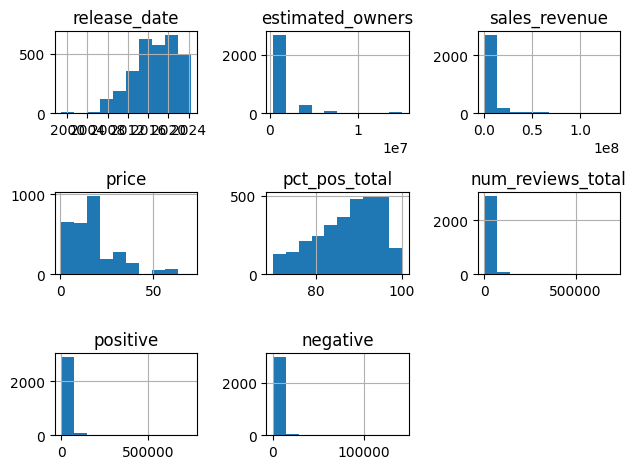

In [161]:
df2.hist()
plt.tight_layout()

In [162]:
for column in df2[['categories','genres','tags','supported_languages','full_audio_languages']]:
    print(df2[column].isna().value_counts())
    print('--------------------------')

categories
False    3039
Name: count, dtype: int64
--------------------------
genres
False    3029
True       10
Name: count, dtype: int64
--------------------------
tags
False    3038
True        1
Name: count, dtype: int64
--------------------------
supported_languages
False    3039
Name: count, dtype: int64
--------------------------
full_audio_languages
False    1767
True     1272
Name: count, dtype: int64
--------------------------


In [163]:
#Récupération et décompte pour chaque intitulé
null = {'genres': df2[df2['genres'].isna()==True].index, 
        'tags': df2[df2['tags'].isna()==True].index, 
        'supported_languages': df2[df2['supported_languages'].isna()==True].index, 
        'full_audio_languages': df2[df2['full_audio_languages'].isna()==True].index}

dicts = {'categories':{}, 'genres':{}, 'tags':{}, 'supported_languages':{}, 'full_audio_languages':{}}
for row in df2.index:
    for column in dicts.keys():
        
        if column!='categories' and row in null[column]:
            continue
        
        for word in df2.loc[row,column]:
            if word in dicts[column].keys():
                dicts[column][word] += 1
            else:
                dicts[column].update({word: 1})

#Uniformisation sur des ensembles de colonnes
all_categories, languages = {}, {}
for keyy in dicts.keys():
    if keyy=='categories':
        for key, value in dicts[keyy].items():
            all_categories.update({key: [value,np.nan,np.nan]})

    elif keyy=='genres':
        for key, value in dicts[keyy].items():
            if key in all_categories.keys():
                all_categories[key][1] = value
            else:
                all_categories.update({key: [np.nan,value,np.nan]})    

    elif keyy=='tags':
        for key, value in dicts[keyy].items():
            if key in all_categories.keys():
                all_categories[key][2] = value
            else:
                all_categories.update({key: [np.nan,np.nan,value]}) 

    elif keyy=='supported_languages':
        for key, value in dicts[keyy].items():
            languages.update({key: [value,np.nan]})
    
    elif keyy=='full_audio_languages':
        for key, value in dicts[keyy].items():
            if key in languages.keys():
                languages[key][1] = value
            else:
                languages.update({key: [np.nan,value]})  

In [164]:
df3 = pd.DataFrame(all_categories).T
df3.columns=['categories','genres','tags']
df3.head()
df3.describe()

,categories,genres,tags
count,39.000000,13.000000,433.000000
mean,574.871795,601.000000,131.177829
std,782.166767,613.237583,255.763134
min,8.000000,2.000000,1.000000
25%,63.000000,90.000000,15.000000
50%,267.000000,524.000000,43.000000
75%,575.500000,786.000000,127.000000
max,2944.000000,1714.000000,2579.000000


Text(0.5, 0, 'Number of games')

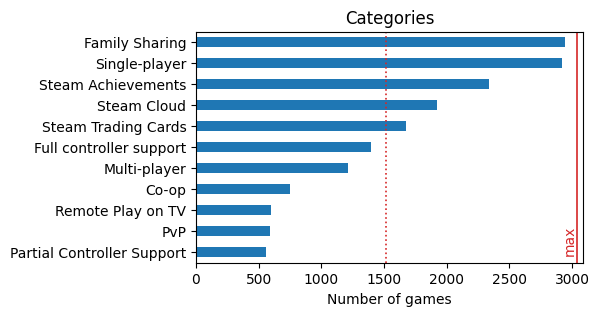

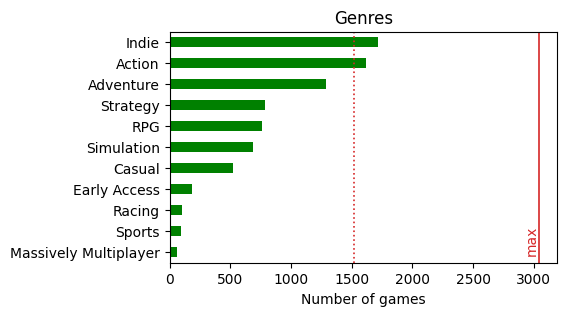

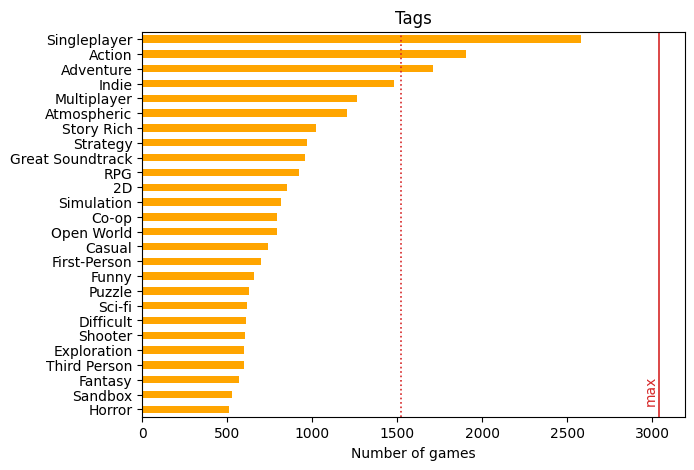

In [165]:
df3[df3['categories']>=550].sort_values(by='categories').plot(kind='barh', y='categories', figsize=(5,3), legend=False)
plt.axvline(len(df2), color='tab:red', linewidth=1.2)
plt.text(x=len(df2)-115, y=0, s='max', rotation=90, color='tab:red')
plt.axvline(len(df2)/2, color='tab:red', linewidth=1.2, linestyle=':')
plt.title('Categories')
plt.xlabel('Number of games')

df3[df3['genres']>=50].sort_values(by='genres').plot(kind='barh', y='genres', color='green', figsize=(5,3), legend=False)
plt.axvline(len(df2), color='tab:red', linewidth=1.2)
plt.text(x=len(df2)-115, y=0, s='max', rotation=90, color='tab:red')
plt.axvline(len(df2)/2, color='tab:red', linewidth=1.2, linestyle=':')
plt.title('Genres')
plt.xlabel('Number of games')

df3[df3['tags']>=500].sort_values(by='tags').plot(kind='barh', y='tags', color='orange', figsize=(7,5), legend=False)
plt.axvline(len(df2), color='tab:red', linewidth=1.2)
plt.text(x=len(df2)-90, y=0.5, s='max', rotation=90, color='tab:red')
plt.axvline(len(df2)/2, color='tab:red', linewidth=1.2, linestyle=':')
plt.title('Tags')
plt.xlabel('Number of games')

#Single-player, avec des possibilités pour Controller support / Multi-player
#1. Action, Aventure | 2. RPG, Stratégie, Simulation, Casual
#Les valeurs des tags sont réparties dans les genres, il vaut mieux regarder les tags dans leur catégorie spécifique 

In [166]:
#Récupération et décompte pour chaque intitulé
null = {'genres': df2[df2['genres'].isna()==True].index, 
        'tags': df2[df2['tags'].isna()==True].index}
         
dicts = {'Indie': {'count':0, 'tags':{}}, 
         'Action': {'count':0, 'tags':{}}, 
         'Adventure': {'count':0, 'tags':{}}, 
         'RPG': {'count':0, 'tags':{}},
         'Strategy': {'count':0, 'tags':{}},
         'Simulation': {'count':0, 'tags':{}},
         'Casual': {'count':0, 'tags':{}}}

for row in df2.index:
    for column in ['genres','tags']:

        if row in null[column]:
            continue
        
        if column=='genres':
            row_selection = {'Indie':0, 'Action':0, 'Adventure':0, 'RPG':0, 'Strategy':0, 'Simulation':0, 'Casual':0}

            for word in df2.loc[row,column]:
                if word in row_selection.keys():
                    row_selection[word] += 1
            if list(row_selection.values())==[0,0,0,0,0,0,0]:
                continue

        elif column=='tags':
            for genre, value in row_selection.items():
                if value==1:
                    dicts[genre]['count'] += 1
                    
                    for word in df2.loc[row,column]:
                        if word in dicts[genre]['tags'].keys():
                            dicts[genre]['tags'][word] += 1
                        else:
                            dicts[genre]['tags'].update({word: 1})
                else:
                    continue

#Uniformisation / Mise en commun
all_in_one = {}
for key, value in dicts['Indie']['tags'].items():
    all_in_one.update({key: [value,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]})

for key, value in dicts['Action']['tags'].items():
    if key in all_in_one.keys():
        all_in_one[key][1] = value
    else:
        all_in_one.update({key: [np.nan,value,np.nan,np.nan,np.nan,np.nan,np.nan]})    

for key, value in dicts['Adventure']['tags'].items():
    if key in all_in_one.keys():
        all_in_one[key][2] = value
    else:
        all_in_one.update({key: [np.nan,np.nan,value,np.nan,np.nan,np.nan,np.nan]}) 
 
for key, value in dicts['RPG']['tags'].items():
    if key in all_in_one.keys():
        all_in_one[key][3] = value
    else:
        all_in_one.update({key: [np.nan,np.nan,np.nan,value,np.nan,np.nan,np.nan]})

for key, value in dicts['Strategy']['tags'].items():
    if key in all_in_one.keys():
        all_in_one[key][4] = value
    else:
        all_in_one.update({key: [np.nan,np.nan,np.nan,np.nan,value,np.nan,np.nan]})  
        
for key, value in dicts['Simulation']['tags'].items():
    if key in all_in_one.keys():
        all_in_one[key][5] = value
    else:
        all_in_one.update({key: [np.nan,np.nan,np.nan,np.nan,np.nan,value,np.nan]}) 

for key, value in dicts['Casual']['tags'].items():
    if key in all_in_one.keys():
        all_in_one[key][6] = value
    else:
        all_in_one.update({key: [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,value]}) 

In [167]:
genres_count = {'Indie': dicts['Indie']['count'], 'Action': dicts['Action']['count'], 'Adventure': dicts['Adventure']['count'], 
                'RPG': dicts['RPG']['count'], 'Strategy': dicts['Strategy']['count'], 'Simulation': dicts['Simulation']['count'], 
                'Casual': dicts['Casual']['count']}

genres_n_tags = pd.DataFrame(all_in_one).T
genres_n_tags.columns = ['Indie','Action','Adventure','RPG','Strategy','Simulation','Casual']
genres_n_tags.head()
genres_n_tags.describe()

,Indie,Action,Adventure,RPG,Strategy,Simulation,Casual
count,422.000000,408.000000,393.000000,356.000000,379.000000,389.000000,384.000000
mean,76.405213,75.659314,63.638677,41.269663,38.187335,33.362468,24.450521
std,148.819421,156.870999,128.440575,81.460681,75.621686,67.529449,49.059698
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,9.000000,6.000000,6.000000,4.750000,4.000000,4.000000,3.000000
50%,27.000000,20.500000,19.000000,12.000000,11.000000,10.000000,9.000000
75%,73.500000,72.250000,65.000000,37.000000,37.000000,29.000000,24.000000
max,1383.000000,1547.000000,1187.000000,717.000000,747.000000,634.000000,463.000000


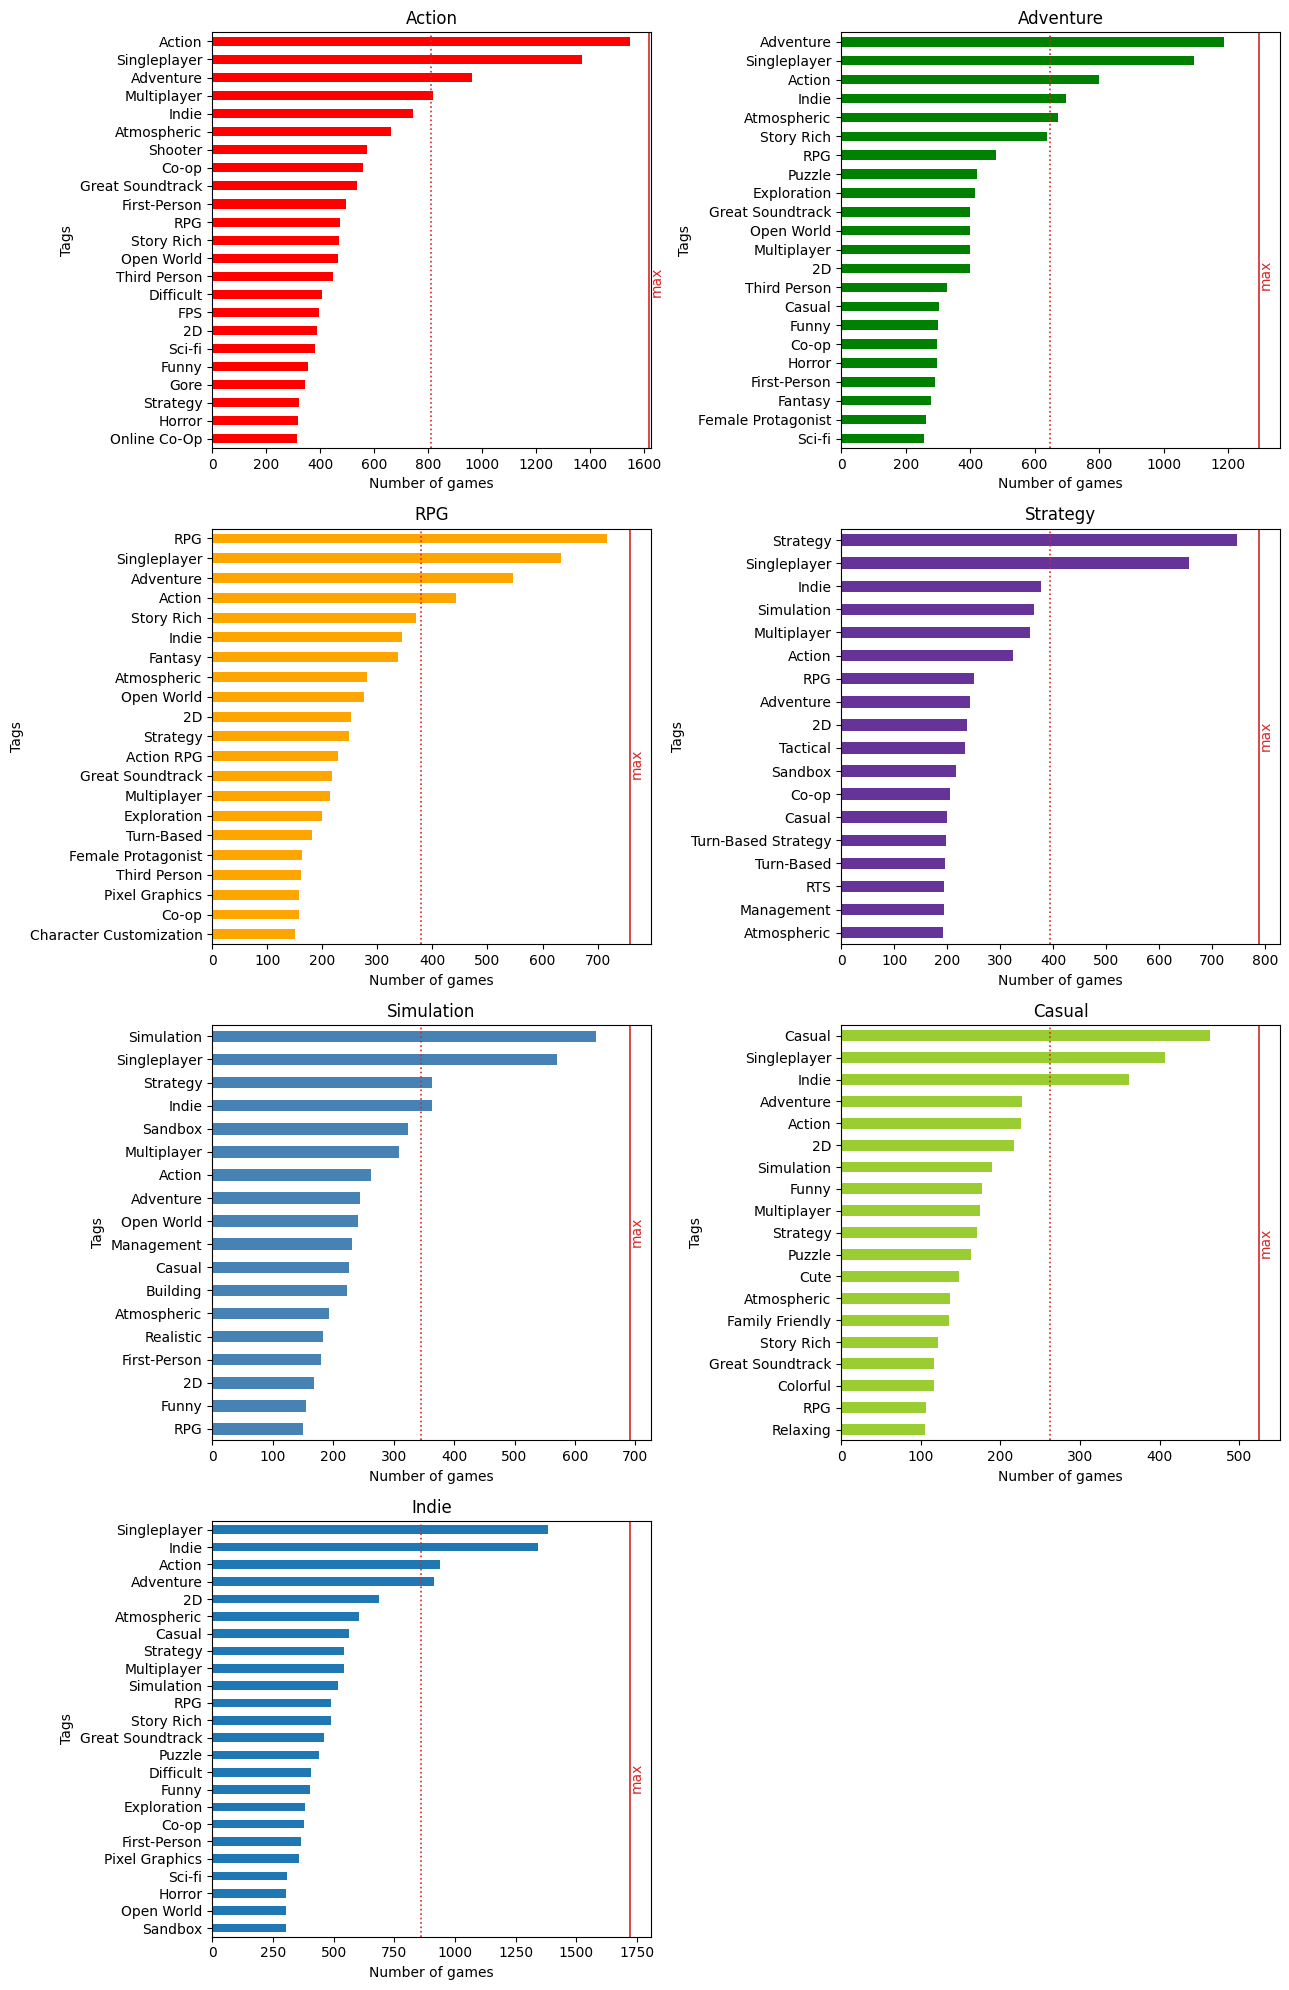

In [168]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(13,20))

genres_n_tags[genres_n_tags['Action']>=300]['Action'].sort_values().plot(kind='barh', ax=ax[0,0], color='red', title='Action')
genres_n_tags[genres_n_tags['Adventure']>=250]['Adventure'].sort_values().plot(kind='barh', ax=ax[0,1], color='green', title='Adventure')
genres_n_tags[genres_n_tags['RPG']>=150]['RPG'].sort_values().plot(kind='barh', ax=ax[1,0], color='orange', title='RPG')
genres_n_tags[genres_n_tags['Strategy']>=175]['Strategy'].sort_values().plot(kind='barh', ax=ax[1,1], color='rebeccapurple', title='Strategy')
genres_n_tags[genres_n_tags['Simulation']>=150]['Simulation'].sort_values().plot(kind='barh', ax=ax[2,0], color='steelblue', title='Simulation')
genres_n_tags[genres_n_tags['Casual']>=100]['Casual'].sort_values().plot(kind='barh', ax=ax[2,1], color='yellowgreen', title='Casual')
genres_n_tags[genres_n_tags['Indie']>=300]['Indie'].sort_values().plot(kind='barh', ax=ax[3,0], title='Indie')
ax[3,1].set_axis_off()

axes_x, axes_y = [0,0,1,1,2,2,3], [0,1,0,1,0,1,0]
variables = ['Action','Adventure','RPG','Strategy','Simulation','Casual','Indie']

for x, y, var in zip(axes_x, axes_y, variables):
    ax[x,y].axvline(genres_count[var], color='tab:red', linewidth=1.2)
    ax[x,y].text(x=genres_count[var], y=8, s='max', rotation=90, color='tab:red')
    ax[x,y].axvline(genres_count[var]/2, color='tab:red', linewidth=1.2, linestyle=':')
    ax[x,y].set_xlabel('Number of games')
    ax[x,y].set_ylabel('Tags')

plt.tight_layout()

#Jeux d'action : single ou multi-player, jeux de tir à la 1e/3e personne, RPG riches en récits et open-world
#Jeux d'aventure : single-player, jeux d'action immersifs riches en récits, RPG avec de la réflexion et de l'exploration, Open-world avec du multi-player 
#Jeux RPG : single-player, jeux d'action ou d'aventure, riches en récits et fantaisistes

#Jeux de stratégie : single-player, jeux de simulation multi-joueurs, RPG d'aventure en 2D
#Jeux de simulation : single ou multi-player, jeux de stratégie, sandbox multi-joueurs / aventure en open-world

#Jeux casual : single-player, aventure, action, simulation
#Jeux indé : single-player, aventure, action